## Projekt - Gerichtete Perkolation

Wir wollen gerichtete Kanten-Perkolation auf einem zwei-dimensionalen, rechteckigem Gitter untersuchen 
(Abb. 1). Die gerichteten Kanten zwischen den indizierten Gitterpunkten 
$A_{ti}\to A_{t+1i}$ sowie $A_{ti}\to A_{t+1 i+1}$ werden unabhaengig voneinander mit einer 
Wahrscheinlichkeit $0\le p\le 1$ gesetzt, und man sagt, das Gitter perkoliert, wenn eine 
gerichtete Verbindung zwischen zwei Gitterpunkten $A_{0i}$ und $A_{T_\textrm{max}j}$ ueber 
gesetzte Kanten existiert. Nimmt das Feld `A[t,i]` die Werte `1` und `0` an, jenachdem, 
ob ein gerichteter Pfad zwischen einem Gitterpunkt `A[0,:]` und `A[t,i]` existiert, 
so ergeben sich die entsprechenden Eintraege der Zeile `A[t+1,:]` allein aus der vorherigen 
Zeile `A[t,:]` und der Uebergangswahrscheinlichkeit $p$. Gerichtete Perkolation 
kann daher als iterativer Prozess `A[now,:]` $\to$ `A[nxt,:]` beliebig lange auf einem Feld 
mit zwei Zeilen simuliert werden, wenn die Indexvariablen `now` und `nxt` in jedem Schritt 
einfach vertauscht werden. Als Anfangbedingung gelte `A[0,:]=1`. Felder mit dem Wert `1` koennen auch als "aktiv" bezeichnet werden. In diesem Fall beschreibt gerichtete Perkolation einen Prozess, in dem ein aktiver Gitterpunkt in einem Zeitschritt einen Nachbarn aktivieren kann und, unabhaengig davon, selbst inaktiv werden kann.

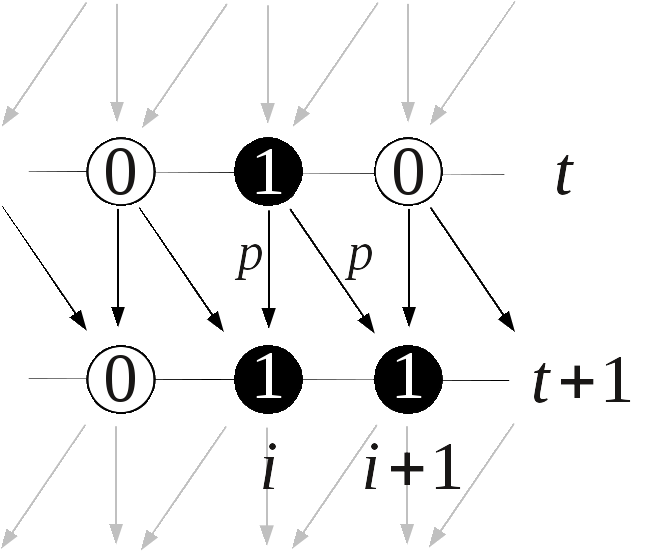

In [3]:
from IPython.display import Image
Image(filename="./DPFig.png", width=300)

Abbildung 1 : Ist ein Gitterpunkt zum Zeitpunkt $t$ aktiv, so bleibt er mit der Wahrscheinlichkeit $p$ in einem Zeitschritt aktiv und aktiviert, davon unabhaengig, seinen rechten Nachbarn ebenso mit einer Wahrscheinlichkeit $p$. Wechselt man in jedem Zeitschritt zwischen rechtem und linkem Nachbarn, vermeidet man eine mittlere Drift nach rechts.

**Achtung :** Versuchen Sie mit Feldern von ganzen Zahlen (`dtype=int`) zu arbeiten, 
und vermeiden Sie explizite Schleifen ueber Feldindizes, um einen moeglichst schnellen 
Python Code zu erhalten. Verwenden Sie vektorisierte Operationen, Indexnotationen und verschiedene 
Views ueber Felder.

Ein Perkolationsexperiment besteht aus der Simulation eines solchen Perkolationsprozesses bei gegebener Zeilenlaenge $N$ des Feldes `A[:,0:N-1]`, maximaler Simulationszeit $T_\textrm{max}$, sowie der Wahrscheinlichkeit $p$, dass ein Wert `A[now,i]==1` nach `A[nxt,i]` bzw. `A[nxt,mod(i+1,N)]` propagiert wird (hier mit periodischen Randbedingungen). Das Resultat des Experimentes sind Zahlen $(r_0,r_1,\dots r_k,r_\textrm{final},T_\omega)$, wobei $r_l$ der Anteil `sum(A[now,:])/float(N)` der "aktiven" Zellen zu den Zeitpunkten $t_l = 2^l < T_\textrm{max}$ und $t_\textrm{final}=T_\textrm{max}$ ist, und $T_\omega$ der erste Zeitpunkt, an dem keine Zellen mehr aktiv sind. Falls $T_\omega>T_\textrm{max}$ ist, soll der Wert $T_\omega=T_\textrm{max}+1$ angenommen werden. Ansonsten kann das Experiment nach $T_\omega$ abgebrochen werden, da fuer alle $t_l\ge T_\omega$ folgt $r_l=0$.

- Schreiben Sie eine Funktion `r,Tohm,Pic = DPerc(N,p,Tmax,Tshow=0)`, welche ein Perkolationsexperiment durchfuehrt, und die Aktivitaeten $r_{l=0\dots k}$ und $r_\textrm{final}$ in einem Feld `r[0:k+2]` sowie $T_\omega$ als ganze Zahl `Tohm` zurueckliefert. Falls die ganze Zahl `Tshow` ungleich Null ist, so soll die Matrix `Pic[0:Tshow-1,0:N-1]` die ersten `Tshow` Zeilen des Experiments enthalten. Ansonsten wird `Pic=None` zurueckgeliefert.
- Experimentieren Sie mit verschiedenen Werten von $p$ und $N$, und erzeugen Sie Bilder von `Pic`, welche das das Systemverhalten gut repraesentieren. **Hinweis :** Sie koennen das Programm so modifizieren, dass die Drift in Richtung groesserer Spalten eliminiert wird und die Bilder symmetrischer aussehen.
- Beschreiben Sie Ihre Beobachtungen mit Bezug auf die Bilder.

In [56]:
import numpy as np
import pylab as py
%matplotlib inline

In [ ]:
def  DPerc(N,p,Tmax,Tshow=0):
    A=np.array([0:Tmax,0:N-1])
    
   
    
    kr=
    r=np.array([0:k+2])
    
    if Tshow=0:
        Pic = None
    else:
        Pic = Pic[0:Tshow-1,0:N-1]
        
    return r,Tohm,Pic

In [2]:
def update(A,ids,p=0.7):
    l=len(A)
    ku=(np.random.rand(l)<p).astype(np.int)
    ks=(np.random.rand(l)<p).astype(np.int)
    '''
    print(A)
    print(ku)
    print(ks)
    print((A*ku)|(A*ks[ids]))
    '''
    return(A*ku)|(A[ids]*ks) 



20000


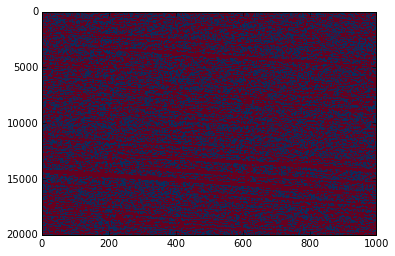

In [97]:
l=1000
p=0.65
test_len=100

id=[i for i in range(0,l-1)]
idr=[l-1]
idr.extend(id)

A=(np.random.rand(l)<p).astype(np.int)
counter=0
L = []
while sum(A)>0 and counter<20000:
    
    #print(A)
    
    A=update(A,idr,p=p)
    L.append(A)
    
    counter +=1
    
py.imshow(L, interpolation=None, aspect = "auto", cmap = "RdBu" )    
#print(L)
print(counter)
 

In [87]:
py.imshow?

In [ ]:
l=1000
p=0.65
test_len=100

id=[i for i in range(0,l-1)]
idr=[l-1]
idr.extend(id)

A=(np.random.rand(l)<p).astype(np.int)
counter=0
L = []
while sum(A)>0 and counter<20000:
    
    #print(A)
    
    A=update(A,idr,p=p)
    L.append(A)
    
    counter +=1
    
py.imshow(L, interpolation=None, aspect = "auto", cmap = "RdBu" )    
#print(L)
print(counter)

In [58]:
print((A*ku)|(A[idr]*ks))

[1 1 1 1 0]


In [60]:
idr=[l-1]
id=[i for i in range(0,l-1)]
idr.extend(id)
print(idr)

[4, 0, 1, 2, 3]


Die kritische Uebergangswahrscheinlichkeit $p_{cr}$ ergibt sich im Grenzfall sehr grosser Systeme $N\to\infty$ daraus, dass die Aktivitaet fuer $p<p_{cr}$ asymptotisch exponentiell gegen Null geht und fuer $p>p_{cr}$ bei einem von Null verschiedenen Wert saturiert. Am kritischen Punkt gilt $r(t)\sim t^{-\delta}$, allerdings nur solange $r\gg O(1/N)$.

- Fuehren Sie Perkolationsexperimente in grossen Systemen $N$ ueber lange Zeitraeume $T_\textrm{max}$ durch, und plotten Sie `r[0:k+1]` doppelt logarithmisch gegen die Zeiten $t_{l=0\dots k}=2^l$. Grenzen Sie die kritische Uebergangswahrscheinlichkeit so genau ein, wie es Ihnen in vertretbarer Zeit moeglich ist, und bestimmen Sie zusaetzlich den Exponenten $\delta$ durch lineare Regression im log-log plot.
- Bestimmen Sie fuer Uebergangswahrscheinlichkeiten $p>p_{cr}$ die Aktivitaet $r(p)$, bei der der Perkolationsprozess saturiert, plotten Sie diese als Funktion von $|p-p_{cr}|$ doppelt logarithmisch, und bestimmen Sie $\beta$ unter der Annahme $r(p)\sim |p-p_{cr}|^\beta$.
- Schreiben Sie eine Funktion `r, Tohm = PercStats(N,p,Tmax,anz)`, welche `anz` Perkolationsexperimente durchfuehrt, und im Feld `r[0:k+1]` den *Median* der Aktivitaeten zu den Zeitpunkten $t_{l=0\dots k}=2^l<T_\textrm{max}$ sowie $t_\textrm{final}=T_\textrm{max}$, und in `Tohm` den *Median* der Zeiten $T_\omega$ zurueckliefert. Der Median ist das `anz/2`-kleinste Ergebnis in einer Serie aus `anz` Experimenten.
- Schreiben Sie ein Programm, welches die Funktion `PercStats(N,p,Tmax,anz)` fuer jeden Wert $p_\textrm{min}\le p_n\le p_\textrm{max}$ einer feinen Diskretisierung eines Intervals von Wahrscheinlichkeiten aufruft, und die Ergebnisse zeilenweise in einer Datei ausgibt. Die erste Zeile der Datei soll als Kommentar die Form 
`# N=..., Tmax=..., anz=...`
haben, und jede weitere Zeile soll als ersten Eintrag den Wert $p_n$ zu stehen haben, fuer den die Statistik erstellt wurde. 

**Hinweis :** Benutzen Sie den Befehl `file.flush()`, um waehrend die Simulation laeuft das Schreiben in die Datei zu erzwingen.

- Lassen Sie das Programm ueber einem interessanten Intervall von Wahrscheinlichkeiten mit hinreichend grosser Anzahl `anz` von Experimenten an jedem Punkt laufen. Erzeugen Sie Dateien fuer $N=128, 256, 512$ und $1024$, sowie $T_\textrm{max}=16N$, und plotten Sie $r_\textrm{final}(p)$, sowie $T_\omega(p)$.

**Zusatzaufgabe :**

- Wiederholen Sie den Versuch mit der Aenderung, dass nicht nur der jeweils rechte Nachbar aktiviert werden kann, sondern unabhaengig davon auch der linke.
